# System Dynamics Modeling
Turning the rules that govern the evolution of a quantity into a differential equation (or set of equations) is a form of modeling known as "system dynamics". There are three basic types of techniques for solving system dynamics problems, 

* **Analytical techniques** try to find a formula that describes the quantity using a variety of mathematical techniques related to integration, linear algebra, and other transformations. 

* **Qualitative techniques** involve sketching or plotting the graph of the quantity and describing its behavior near bifurcations, asymptotes, infections, etc. 

* **Numerical techniques** train computers to perform arithmetic that yields approximations of the quantity. 

### How to build a model
A model represents some aspect of a real entity or behavior. The goal is not to produce an exact "copy" but to operate well under mathematical formulism and within some constraints or boundaries. Some basic steps for creating a model are

1. Clearly state the assumptions on which the model will be based.
2. Completely describe the variables and parameters that will be used by the model.
3. Use assumptions from (1) to derive equations relating the quantities in (2). 

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set_theme()

# Malthusian Growth
An elementary model for population growth assumes that **"The rate of growth is proportional to the size of the population"**. No other assumptions are made such as limitations on resources, space, etc. This is a good model for small populations in a large environment. The quantities and parameters involved are, 

<br />

$$
t = \text{time (independent variable)} \\
P(t) = \text{population (dependent variable)} \\
k = \text{growth rate (parameter)} \\
$$

<br />

The units of _t_ and _P(t)_ depend entirely on the context. Malthusian growth can model bacterial infections, colonization, and idea propagation. _t_ could be measured in minutes or in decades. _P(t)_ could mean hundreds of cells in a body or billions of invasive insects introduced to a new environment. This model is written as the differential equation, 

$$
\begin{align}
\frac{\partial P}{\partial t} = kP && P(0) = P_0
\end{align}
$$

<br /> 

This is an example of a **first-order ordinary differential equation**. When a differential equation is coupled with initial conditions, this is called an **initial-value problem**. The solution to this equation involves recognizing that a function equal to its derivative times a constant can be expressed as, 

<br />

$$
\begin{align}
P(t) = C \cdot e^{kt}
\end{align}
$$

<br />

This gives us infinitely many solutions, one for each value of _C_. In order to determine _C_, we need to plug in our initial condition, 

<br />

$$
\begin{align}
P_0 = C \cdot e^{k \cdot 0} = C \cdot 1 = C
\end{align}
$$

Therefore, the solution to our initial-value problem is, 


$$
\begin{align}
P(t) = P_0 e^{kt}
\end{align}
$$

<br />

## Plotting Malthusian Growth (Analytic)

In [13]:
num_steps = 1000

t = np.linspace(0, 500, num_steps)

# dt = t[1] - t[0]

k = 0.01

p_0 = 1

In [14]:
p = p_0 * np.exp(k * t)

p[:5]

array([1.        , 1.00501755, 1.01006028, 1.01512831, 1.02022176])

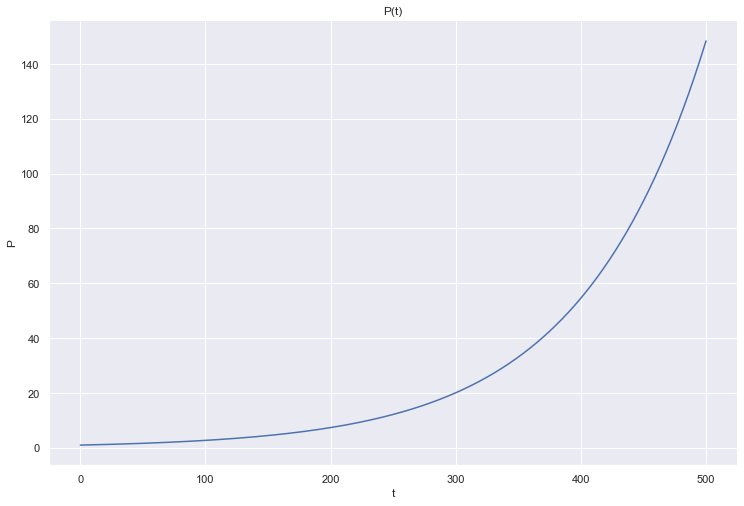

In [15]:
line = sns.relplot(
    data=pd.DataFrame({
        't': t,
        'P': p
    }),
    x='t',
    y='P',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="P(t)"
)

## Plotting Malthusian Growth (Euler's Method)

In [16]:
p_n = np.zeros(num_steps)

p_n[0] = 1

dt = t[1] - t[0]

for n in range(0, num_steps - 1):
    f = k * p_n[n]
    
    p_n[n+1] = p_n[n] + (f * dt)


In [17]:
p_n

array([  1.        ,   1.00500501,   1.01003506,   1.01509029,
         1.02017082,   1.02527678,   1.0304083 ,   1.0355655 ,
         1.04074851,   1.04595746,   1.05119248,   1.0564537 ,
         1.06174126,   1.06705528,   1.0723959 ,   1.07776324,
         1.08315746,   1.08857866,   1.09402701,   1.09950262,
         1.10500563,   1.11053619,   1.11609443,   1.12168049,
         1.1272945 ,   1.13293662,   1.13860697,   1.14430571,
         1.15003296,   1.15578888,   1.16157361,   1.16738729,
         1.17323007,   1.1791021 ,   1.18500351,   1.19093446,
         1.19689509,   1.20288555,   1.208906  ,   1.21495658,
         1.22103745,   1.22714875,   1.23329063,   1.23946326,
         1.24566678,   1.25190135,   1.25816712,   1.26446425,
         1.2707929 ,   1.27715323,   1.28354538,   1.28996953,
         1.29642584,   1.30291446,   1.30943555,   1.31598928,
         1.32257581,   1.32919531,   1.33584794,   1.34253387,
         1.34925326,   1.35600628,   1.36279309,   1.36

In [18]:
df = pd.DataFrame({
    't': t,
    'p': p,
    'p_n': p_n
})

df.head()

,t,p,p_n
0,0.000000,1.000000,1.000000
1,0.500501,1.005018,1.005005
2,1.001001,1.010060,1.010035
3,1.501502,1.015128,1.015090
4,2.002002,1.020222,1.020171


In [19]:
df_melted = pd.melt(df, ['t'])
df_melted.head()

,t,variable,value
0,0.000000,p,1.000000
1,0.500501,p,1.005018
2,1.001001,p,1.010060
3,1.501502,p,1.015128
4,2.002002,p,1.020222


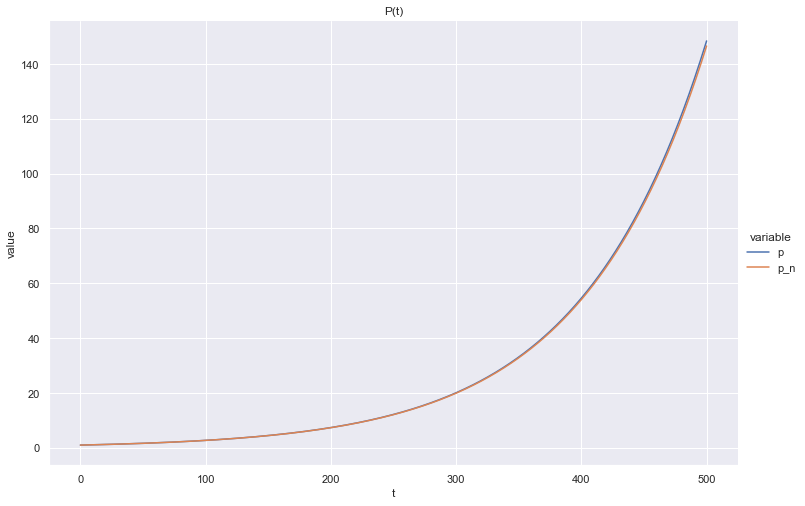

In [20]:
line = sns.relplot(
    data=df_melted,
    x='t',
    y='value',
    hue='variable',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="P(t)"
)

# Logistic Growth
The logistic equation is a model of population growth where the size of the population exerts negative feedback on its growth rate. As population size increases, the rate of increase declines, leading eventually to an equilibrium population size known as the carrying capacity.  The time course of this model is the familiar S-shaped growth that is generally associated with resource limitation. This model has only two parameters: k is the intrinsic growth rate and N is the carrying capacity.


<br />

$$
t = \text{time (independent variable)} \\
P = \text{population (dependent variable)} \\
k = \text{growth rate (parameter)} \\
N = \text{carrying capacity} \\
$$

<br />

When the population size is very small, the term in the parentheses is approximately one and population growth is approximately exponential.  When population size is close to the carrying capacity (i.e., P=N), the term in parentheses approaches zero, and population growth ceases.

<br />

$$
\begin{align}
\frac{\partial P}{\partial t} = kP \cdot (1 - \frac{P}{N}) && P(0) = P_0
\end{align}
$$

<br />

This equation is said to be **nonlinear** because its RHS is not a linear function of _P_.

In [26]:
num_steps = 100

t = np.linspace(0, 1000, num_steps)

dt = t[1] - t[0]

k = 0.01

N = 50

In [29]:
p = np.zeros(num_steps)

p[0] = 2

for n in range(0, num_steps - 1):
    f = k * p[n] * (1 - (p[n] / N))
    
    p[n+1] = p[n] + (f * dt)

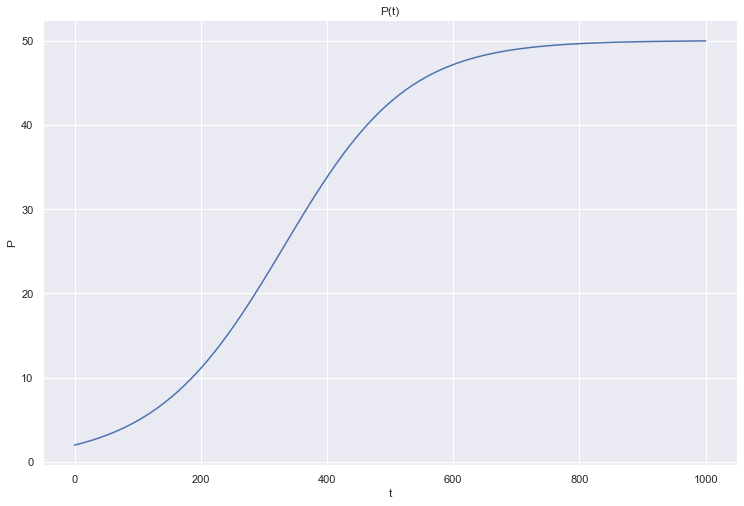

In [30]:
line = sns.relplot(
    data=pd.DataFrame({
        't': t,
        'P': p
    }),
    x='t',
    y='P',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="P(t)"
)

# Predator-Prey Systems
The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) is a **first-order nonlinear system of equations** used to model two species interacting. No species lives in isolation and it is common to find relationships where one species "eats" another. 


<br />

$$
\begin{align}
t &= \text{time (independent variable)} \\
x &= \text{prey population (rabbits)} \\
y &= \text{predator population (foxes)} \\ \\
k &= \text{prey growth rate} \\
g &= \text{predator dealth rate)} \\
b &= \text{prey-predator interaction coefficient} \\
d &= \text{prey-predator interaction coefficient} \\
\end{align}
$$

<br />

* When no foxes are present, rabbits exhibit malthusian growth (k)
* Foxes eat rabbits at a rate that is proportional (b) to the rate at which foxes and rabbits interact
* Without rabbits to eat, the fox population declines (g)
* The rate at which foxes are born is proportional (d) to the number of rabbits eaten.

<br />

$$
\begin{align}
\frac{\partial x}{\partial t} = k \cdot x - b \cdot x \cdot y && x(0) = x_0 \\ \\
\frac{\partial y}{\partial t} = - g \cdot y + d \cdot x \cdot y && y(0) = y_0 \\
\end{align}
$$

<br />

In [31]:
num_steps = 1000

t = np.linspace(0, 1000, num_steps)

dt = t[1] - t[0]

k = 0.01
b = 0.001

d = 0.001
g = 0.01

In [32]:
x = np.zeros(num_steps)
x[0] = 10.0

y = np.zeros(num_steps)
y[0] = 5.0


for n in range(0, num_steps - 1):
    f1 = k * x[n] - b * x[n] * y[n]
    
    f2 = -g * y[n] + d * x[n] * y[n]
    
    x[n+1] = x[n] + (f1 * dt)
    
    y[n+1] = y[n] + (f2 * dt)

In [33]:
x


array([10.        , 10.05005005, 10.1003506 , 10.15090037, 10.20169803,
       10.25274218, 10.30403136, 10.35556407, 10.40733871, 10.45935365,
       10.51160719, 10.56409754, 10.61682286, 10.66978125, 10.72297072,
       10.77638921, 10.8300346 , 10.8839047 , 10.9379972 , 10.99230977,
       11.04683997, 11.10158527, 11.15654307, 11.2117107 , 11.26708538,
       11.32266425, 11.37844438, 11.43442271, 11.49059613, 11.54696141,
       11.60351523, 11.66025417, 11.71717473, 11.77427329, 11.83154613,
       11.88898942, 11.94659925, 12.00437157, 12.06230224, 12.12038701,
       12.1786215 , 12.23700124, 12.29552163, 12.35417793, 12.41296533,
       12.47187885, 12.53091341, 12.5900638 , 12.64932468, 12.70869058,
       12.7681559 , 12.82771492, 12.88736176, 12.94709042, 13.00689475,
       13.06676848, 13.12670517, 13.18669826, 13.24674102, 13.3068266 ,
       13.36694798, 13.42709799, 13.48726932, 13.5474545 , 13.60764589,
       13.66783571, 13.72801602, 13.78817869, 13.84831547, 13.90

In [34]:
y

array([ 5.        ,  5.        ,  5.0002505 ,  5.00075278,  5.00150815,
        5.00251796,  5.00378357,  5.0053064 ,  5.00708789,  5.00912951,
        5.01143278,  5.01399923,  5.01683044,  5.01992804,  5.02329366,
        5.02692898,  5.03083574,  5.03501569,  5.03947062,  5.04420236,
        5.04921278,  5.05450379,  5.06007733,  5.06593539,  5.07207998,
        5.07851317,  5.08523706,  5.0922538 ,  5.09956555,  5.10717456,
        5.11508307,  5.12329339,  5.13180787,  5.14062891,  5.14975892,
        5.15920038,  5.16895581,  5.17902777,  5.18941885,  5.20013172,
        5.21116905,  5.22253358,  5.23422808,  5.2462554 ,  5.25861838,
        5.27131994,  5.28436305,  5.2977507 ,  5.31148595,  5.32557189,
        5.34001165,  5.35480843,  5.36996546,  5.38548602,  5.40137342,
        5.41763104,  5.43426229,  5.45127063,  5.46865958,  5.48643267,
        5.50459351,  5.52314575,  5.54209305,  5.56143917,  5.58118787,
        5.60134298,  5.62190835,  5.64288789,  5.66428556,  5.68

In [35]:
df = pd.DataFrame({'x': x, 'y': y, 't': t})
df.head()

,x,y,t
0,10.000000,5.000000,0.000000
1,10.050050,5.000000,1.001001
2,10.100351,5.000251,2.002002
3,10.150900,5.000753,3.003003
4,10.201698,5.001508,4.004004


In [ ]:
# line = sns.relplot(
#     data=df,
#     x='x',
#     y='y',
#     kind='line',
#     height=7,
#     aspect=1.5
# ).set(
#     title="Rabbits vs. Foxes"
# )

In [36]:
df_melted = pd.melt(df, ['t'])
df_melted.head()

,t,variable,value
0,0.000000,x,10.000000
1,1.001001,x,10.050050
2,2.002002,x,10.100351
3,3.003003,x,10.150900
4,4.004004,x,10.201698


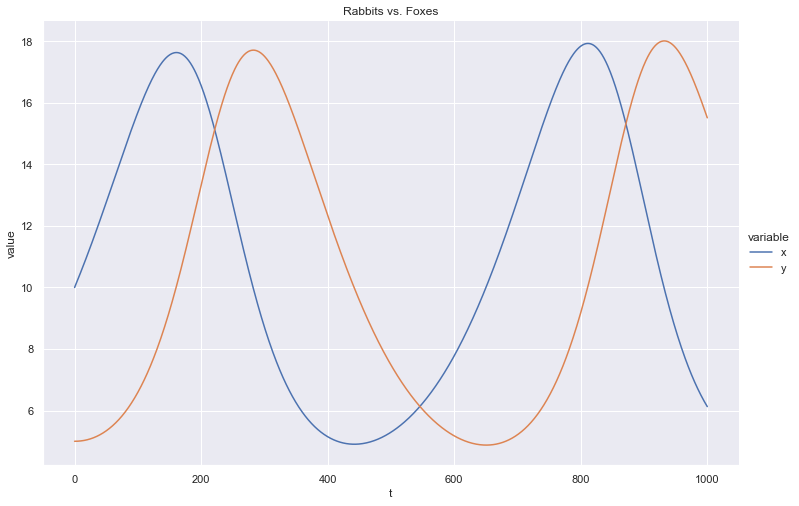

In [37]:
line = sns.relplot(
    data=df_melted,
    x='t',
    y='value',
    hue='variable',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="Rabbits vs. Foxes"
)